# Module 6:  Pandas
## Chapter 16 from the Alex DeCaria textbook

Pandas started as a way to manipulate financial data but obviously can be used for diverse applications.

Pandas introduces two new data type structures. The first data structure type is a Pandas *series*, which is a one dimensional array, but it is indexed. The second data structure is a *'dataframe'*, which is similar to a 2-D NumPy array, except that it can hold multiple data types within it (strings, floats, integers, datetime objects, ect...) and also has an index. Dataframes are really just collections of series, and dataframes are nominally equivalent to excel spreadsheets.

Pandas is particularly good for working with time series data. In addition,  Pandas also provides easier ways to view data either time series or the equivalent of spreadsheets, 2D arrays. For today, we will: 
- Read csv-formatted data into Python 
- Learn how to subset and slice dataframes 
- Aggegrate and group data
- Work with time objects in Pandas

**Before starting:** Make sure that you open up a Jupyter notebook session using OnDemand so you can interactively follow along with today's lecture! Also be sure to copy this Jupyter Notebook and then create a new file with the current date to use to experiment with the syntax. 


    

In [1]:
import numpy as np
import datetime as dt
from datetime import datetime, timedelta, timezone
import zoneinfo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#access a function from the urllib module
from urllib.request import urlretrieve
#also let's use a linux command to see the file size
import os

# Pandas 

You have seen Pandas being used extensively before in the Chapter 2 code 
and also when dealing with reading data into Pandas  in module 4. So let's go back and use the slc_temp.ipynb notebook code but change it to read different variables, in this case pressure and wind speed and direction, at a different location, in this case, above us, WBB

We will be accessing public data from a commercial site for which I need to disclose that I am involved with the company, Synoptic Data:

I am on the Board of Directors
I am a shareholder
I have a grant from that company to help with their customer support and research and development

In [2]:
#grab station pressure and wind speed and direction data at WBB in October
url = "https://api.synopticdata.com/v2/stations/timeseries?&token=bace3f05279d4de1bb2f03011843709e&start=202210010600&end=202210090600&obtimezone=local&output=csv&stid=wbb&vars=pressure,wind_speed,wind_direction"
# define the file to write the data into
filename = "wbb.csv"
#let's try to get the file from the web
try:
    #get the file over the web
    urlretrieve(url, filename)
    print("Saved", filename, os.path.getsize(filename)/1000., 'KB')
except:
    print("something wrong grabbing the file")
    print("but the program continues, so may be in error")

Saved wbb.csv 548.395 KB


# STOP!
Launch a terminal window and look at the file uaing more

How many header lines are there?

Are there any footer lines that need to be removed? How do you check for those?

How many columns in each row of data?

In [3]:
#define the headers
headers = ['STID','Date','PRES','SPED','DRCT']
#define the data types as a dictionary
dtypes = { 'STID': 'str','Date': 'str', 'PRES': 'float','SPED': 'float','DRCT': 'float'}


#there may be times with no actual values 
#those will get changed to NaN by the pandas read_csv function by the option na_filter
#Create a pandas dataframe. 

#There is a lot packed into the following read, so let's explain a bit first
# 1) the parse_dates option indicates take the 2nd column, Date, and then use the "date_parser"
# now we have to confess to what the lambda  operation is

In [4]:
#See page 113
#lambda is a one-line function for really simple operations
# you need to define it before you use it

In [5]:
# for example
# compute area of a circle
area = lambda radius : np.pi * radius**2
print(area(10))

314.1592653589793


In [6]:
# so in the following date_parser is a one-line function that uses the argument col (all the times)
# in this case, the col is processed using the pandas to_datetime function and uses the argument utc=True 
# since the data are available in UTC time

In [7]:
#For now, just think about it as an upgrade to a numpy array with an "index" in this case the Datew
#the date will be an index to organize the pressure and wind speed columns. 
#note the column labels use the "new" names not the names in the original file
df_wbb = pd.read_csv('wbb.csv', parse_dates=['Date'], \
                 date_parser=lambda col: pd.to_datetime(col, utc=True),  \
                 names=headers,dtype = dtypes,na_filter=True,skiprows=8,index_col=['Date'],usecols=['Date','PRES','SPED','DRCT'])

#convert from Pascals to hectoPascals (100 Pa), equivalent to a beloved unit millibar, mb
#look at how we reference the pressure column by the dataframe name "dot" column name
df_wbb.PRES = df_wbb.PRES/100.
#and finally let's keep the data with precision of 10ths of kPa and tenths of m/s
#here we again use a lambda function to define the output format
pd.set_option('display.float_format', lambda x: '%.1f' % x)

#display the pandas dataframe 
df_wbb

PRES  SPED  DRCT
Date                                       
2022-10-01 06:00:00+00:00 853.1   0.0   NaN
2022-10-01 06:01:00+00:00 853.1   0.9 233.2
2022-10-01 06:02:00+00:00 853.1   1.3 221.7
2022-10-01 06:03:00+00:00 853.1   1.2 213.9
2022-10-01 06:04:00+00:00 853.1   1.2 218.1
...                         ...   ...   ...
2022-10-09 05:56:00+00:00 858.3   0.6 298.0
2022-10-09 05:57:00+00:00 858.3   0.1 333.4
2022-10-09 05:58:00+00:00 858.3   0.0   NaN
2022-10-09 05:59:00+00:00 858.3   0.0   NaN
2022-10-09 06:00:00+00:00 858.3   0.0   NaN

[11516 rows x 3 columns]

In [8]:
#what is it?
print(type(df_wbb))
#a dataframe is like a spreadsheet
#Here we have an index defined in terms of the time and two columns of data

<class 'pandas.core.frame.DataFrame'>


In [9]:
#there is no difference between accessing a column by referencing the column name in quotes
# that is 
df_wbb['PRES']

Date
2022-10-01 06:00:00+00:00   853.1
2022-10-01 06:01:00+00:00   853.1
2022-10-01 06:02:00+00:00   853.1
2022-10-01 06:03:00+00:00   853.1
2022-10-01 06:04:00+00:00   853.1
                             ... 
2022-10-09 05:56:00+00:00   858.3
2022-10-09 05:57:00+00:00   858.3
2022-10-09 05:58:00+00:00   858.3
2022-10-09 05:59:00+00:00   858.3
2022-10-09 06:00:00+00:00   858.3
Name: PRES, Length: 11516, dtype: float64

In [10]:
# using the following format is equivalent
# I find the following cleaner and less prone to typos
# There are occasions where the above format is required

In [11]:
df_wbb.PRES

Date
2022-10-01 06:00:00+00:00   853.1
2022-10-01 06:01:00+00:00   853.1
2022-10-01 06:02:00+00:00   853.1
2022-10-01 06:03:00+00:00   853.1
2022-10-01 06:04:00+00:00   853.1
                             ... 
2022-10-09 05:56:00+00:00   858.3
2022-10-09 05:57:00+00:00   858.3
2022-10-09 05:58:00+00:00   858.3
2022-10-09 05:59:00+00:00   858.3
2022-10-09 06:00:00+00:00   858.3
Name: PRES, Length: 11516, dtype: float64

In [12]:
#note that the indices (the times) can be accessed from
df_wbb.index

DatetimeIndex(['2022-10-01 06:00:00+00:00', '2022-10-01 06:01:00+00:00',
               '2022-10-01 06:02:00+00:00', '2022-10-01 06:03:00+00:00',
               '2022-10-01 06:04:00+00:00', '2022-10-01 06:05:00+00:00',
               '2022-10-01 06:06:00+00:00', '2022-10-01 06:07:00+00:00',
               '2022-10-01 06:08:00+00:00', '2022-10-01 06:09:00+00:00',
               ...
               '2022-10-09 05:51:00+00:00', '2022-10-09 05:52:00+00:00',
               '2022-10-09 05:53:00+00:00', '2022-10-09 05:54:00+00:00',
               '2022-10-09 05:55:00+00:00', '2022-10-09 05:56:00+00:00',
               '2022-10-09 05:57:00+00:00', '2022-10-09 05:58:00+00:00',
               '2022-10-09 05:59:00+00:00', '2022-10-09 06:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=11516, freq=None)

In [13]:
# what if we want the times to be in MDT rather than UTC?
# apply a time conversion function that converts our times in MST to UTC
df_wbb.index = df_wbb.index.tz_convert('America/Denver')
#the -6:00 in the index values below indicate 6 hours before UTC
df_wbb

PRES  SPED  DRCT
Date                                       
2022-10-01 00:00:00-06:00 853.1   0.0   NaN
2022-10-01 00:01:00-06:00 853.1   0.9 233.2
2022-10-01 00:02:00-06:00 853.1   1.3 221.7
2022-10-01 00:03:00-06:00 853.1   1.2 213.9
2022-10-01 00:04:00-06:00 853.1   1.2 218.1
...                         ...   ...   ...
2022-10-08 23:56:00-06:00 858.3   0.6 298.0
2022-10-08 23:57:00-06:00 858.3   0.1 333.4
2022-10-08 23:58:00-06:00 858.3   0.0   NaN
2022-10-08 23:59:00-06:00 858.3   0.0   NaN
2022-10-09 00:00:00-06:00 858.3   0.0   NaN

[11516 rows x 3 columns]

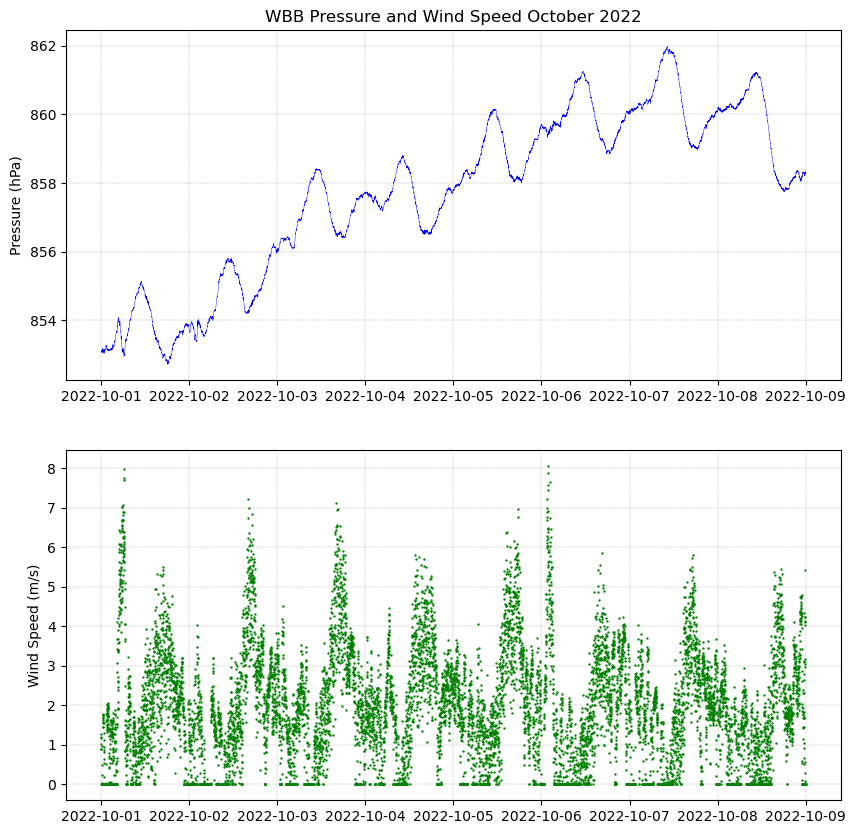

In [14]:
#let's plot the time series of pressure and wind_speed
#it is possible to use special plotting functions for pandas but here we are using generic 
# mstplotlib options
# creates figs in two rows and one column
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,10))

# using the dataframes index Date as the x axis 
#ploting the pressure on the y axis
ax1.plot(df_wbb.index,df_wbb.PRES,color='blue',linewidth=.3)

#similarly for speed
ax2.scatter(df_wbb.index,df_wbb.SPED, color = 'green',marker='.',s=2)

ax1.set(ylabel='Pressure (hPa)')
ax2.set(ylabel='Wind Speed (m/s)')
ax1.grid(linestyle='--', color='grey', linewidth=.2)
ax2.grid(linestyle='--', color='grey', linewidth=.2)
ax1.set_title('WBB Pressure and Wind Speed October 2022')
plt.savefig('figure_wbb_pres_sped.png')
#clean and simple!

In [15]:
#what if we save each column separately?
wbb_pres = df_wbb.PRES
wbb_sped = df_wbb.SPED
print(type(wbb_pres))

<class 'pandas.core.series.Series'>


In [16]:
# so a pandas series is just equivalent to a dataframe with only one column (and an index)
# fundamentally a dataframe is a collection of pandas Series

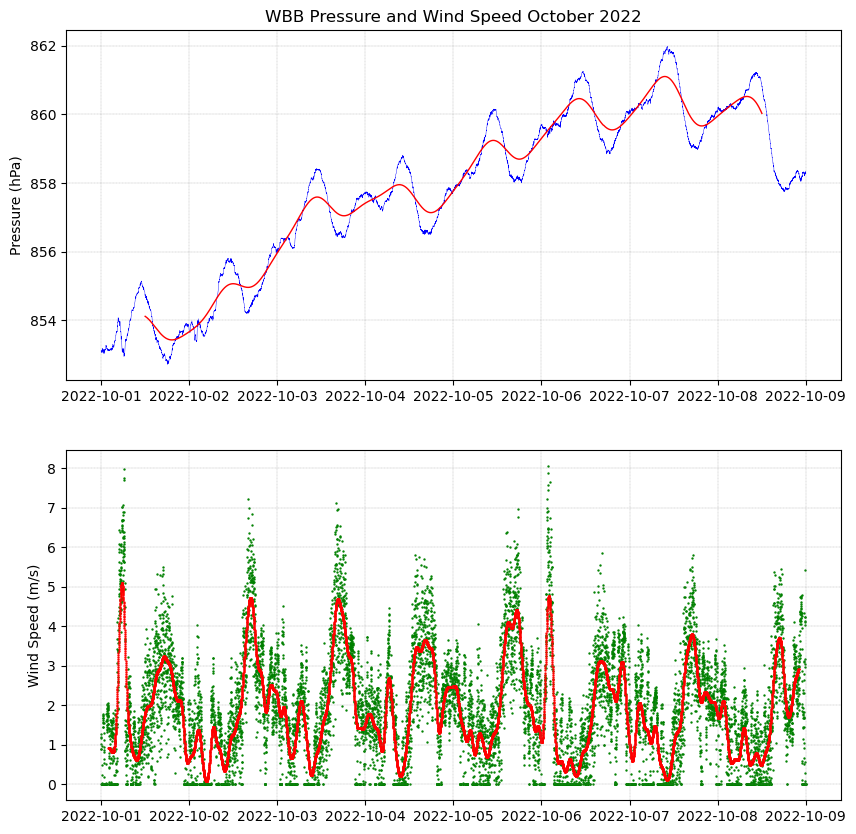

In [17]:
#in chapter 2, there was a complicated low pass filter
#Pandas has a simple function for that, rolling window, that works easily on Series
#but not easily applied to dataframes
#again best to use a short window and possibly use multiple passes if you want to do so
# use it the first time
#use a rolling 6 hour average for pressure
p_r = 6*60
#use a rolling 1 hour average for speed
s_r = 60
roll_pres = wbb_pres.rolling(p_r,center=True).mean()
roll_sped = wbb_sped.rolling(s_r,center=True).mean()
for i in range(0,3):
    roll_pres = roll_pres.rolling(p_r,center=True).mean()
    roll_sped = roll_sped.rolling(s_r,center=True).mean()

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
# using the dataframes index Date as the x axis 
ax1.plot(df_wbb.index,df_wbb.PRES,color='blue',linewidth=.3)
ax1.plot(roll_pres.index,roll_pres,color='red',linewidth=1)
ax2.scatter(df_wbb.index,df_wbb.SPED, color = 'green',marker='.',s=2)
ax2.scatter(roll_sped.index,roll_sped, color = 'red',marker='.',s=2)
ax1.set(ylabel='Pressure (hPa)')
ax2.set(ylabel='Wind Speed (m/s)')
ax1.grid(linestyle='--', color='grey', linewidth=.2)
ax2.grid(linestyle='--', color='grey', linewidth=.2)
ax1.set_title('WBB Pressure and Wind Speed October 2022')
plt.savefig('figure_wbb_pres_sped_smooth.png')

#note that it is not possible to compute values on the tails of the time series.
#change the center option to False. Is that a good idea in order to be able to
#have the most recent average available?

#  Selecting rows 

Selecting a specific row  within a Pandas dataframe is fairly simple. 

In [18]:
# here are the last 10 rows of all columns
print(df_wbb[-10:-1])
#or for just speed
print(df_wbb.SPED[-10:-1])

                           PRES  SPED  DRCT
Date                                       
2022-10-08 23:51:00-06:00 858.3   0.0   NaN
2022-10-08 23:52:00-06:00 858.3   0.0   NaN
2022-10-08 23:53:00-06:00 858.3   0.0 267.6
2022-10-08 23:54:00-06:00 858.3   0.0 289.6
2022-10-08 23:55:00-06:00 858.3   0.0   NaN
2022-10-08 23:56:00-06:00 858.3   0.6 298.0
2022-10-08 23:57:00-06:00 858.3   0.1 333.4
2022-10-08 23:58:00-06:00 858.3   0.0   NaN
2022-10-08 23:59:00-06:00 858.3   0.0   NaN
Date
2022-10-08 23:51:00-06:00   0.0
2022-10-08 23:52:00-06:00   0.0
2022-10-08 23:53:00-06:00   0.0
2022-10-08 23:54:00-06:00   0.0
2022-10-08 23:55:00-06:00   0.0
2022-10-08 23:56:00-06:00   0.6
2022-10-08 23:57:00-06:00   0.1
2022-10-08 23:58:00-06:00   0.0
2022-10-08 23:59:00-06:00   0.0
Name: SPED, dtype: float64


In [19]:
#the other way to do that highlights why rows come before columns
print(df_wbb[-10:-1]['SPED'])
#that's why I prefer the previous format.
#I sometimes lose track of rows vs columns

Date
2022-10-08 23:51:00-06:00   0.0
2022-10-08 23:52:00-06:00   0.0
2022-10-08 23:53:00-06:00   0.0
2022-10-08 23:54:00-06:00   0.0
2022-10-08 23:55:00-06:00   0.0
2022-10-08 23:56:00-06:00   0.6
2022-10-08 23:57:00-06:00   0.1
2022-10-08 23:58:00-06:00   0.0
2022-10-08 23:59:00-06:00   0.0
Name: SPED, dtype: float64


What if we wanted to grab the name of our columns only, and save it as a list?

In [20]:
print(list(df_wbb.columns))

['PRES', 'SPED', 'DRCT']



You can also add new columns to dateframe easily using Pandas. For example, lets add the smoothed values of pressure and speed. Note that here we specify the column name
using the quote format and we have to use the loc function to append the rows


In [21]:
df_wbb.loc[:,'PRES_SMTH'] = roll_pres
df_wbb.loc[:,'SPED_SMTH'] = roll_sped
#note that the first and last values are nan's since the rolling window 
#is centered
df_wbb

PRES  SPED  DRCT  PRES_SMTH  SPED_SMTH
Date                                                             
2022-10-01 00:00:00-06:00 853.1   0.0   NaN        NaN        NaN
2022-10-01 00:01:00-06:00 853.1   0.9 233.2        NaN        NaN
2022-10-01 00:02:00-06:00 853.1   1.3 221.7        NaN        NaN
2022-10-01 00:03:00-06:00 853.1   1.2 213.9        NaN        NaN
2022-10-01 00:04:00-06:00 853.1   1.2 218.1        NaN        NaN
...                         ...   ...   ...        ...        ...
2022-10-08 23:56:00-06:00 858.3   0.6 298.0        NaN        NaN
2022-10-08 23:57:00-06:00 858.3   0.1 333.4        NaN        NaN
2022-10-08 23:58:00-06:00 858.3   0.0   NaN        NaN        NaN
2022-10-08 23:59:00-06:00 858.3   0.0   NaN        NaN        NaN
2022-10-09 00:00:00-06:00 858.3   0.0   NaN        NaN        NaN

[11516 rows x 5 columns]

In [22]:
# Temporal resampling
# Pandas make it very easy to reduce the volume of data by resampling

In [23]:
#compute hourly averages
wbb_hour = df_wbb.resample('H').mean()
print(wbb_hour)

                           PRES  SPED  DRCT  PRES_SMTH  SPED_SMTH
Date                                                             
2022-10-01 00:00:00-06:00 853.1   0.5 166.3        NaN        NaN
2022-10-01 01:00:00-06:00 853.2   1.0  36.2        NaN        NaN
2022-10-01 02:00:00-06:00 853.2   0.7  33.0        NaN        0.9
2022-10-01 03:00:00-06:00 853.3   0.8 119.7        NaN        1.0
2022-10-01 04:00:00-06:00 853.8   2.5 243.3        NaN        2.6
...                         ...   ...   ...        ...        ...
2022-10-08 20:00:00-06:00 858.1   2.3  58.6        NaN        2.3
2022-10-08 21:00:00-06:00 858.3   2.7  34.5        NaN        2.8
2022-10-08 22:00:00-06:00 858.2   3.6  41.7        NaN        2.9
2022-10-08 23:00:00-06:00 858.3   1.5  96.6        NaN        NaN
2022-10-09 00:00:00-06:00 858.3   0.0   NaN        NaN        NaN

[193 rows x 5 columns]


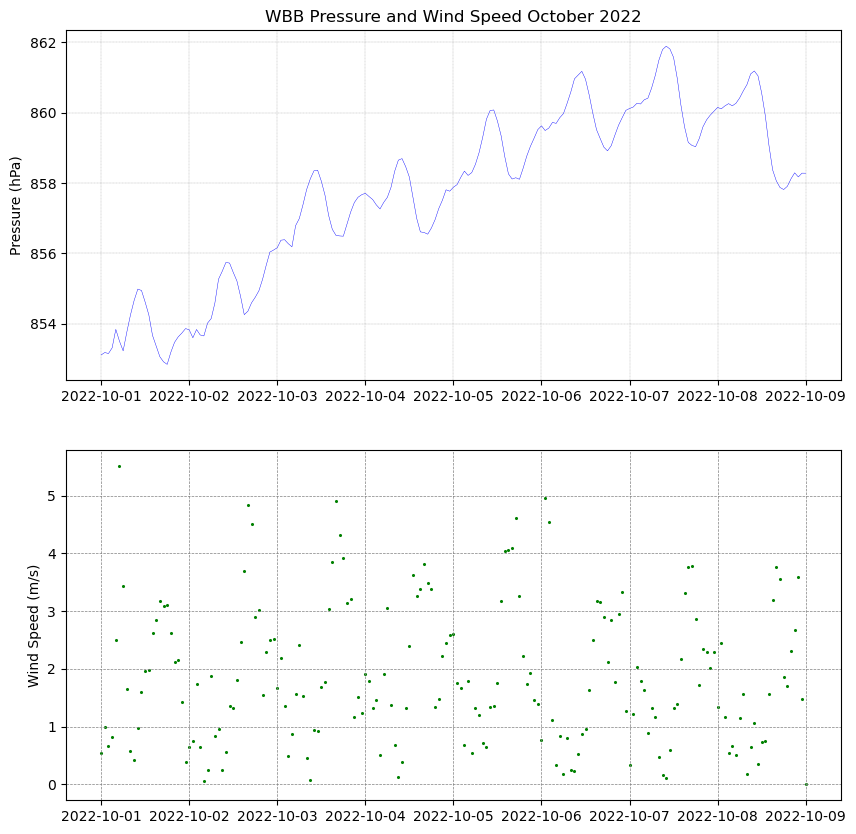

In [24]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
# using the dataframes index Date as the x axis 
ax1.plot(wbb_hour.index,wbb_hour.PRES,color='blue',linewidth=.3)
ax2.scatter(wbb_hour.index,wbb_hour.SPED, color = 'green',marker='.',s=6)
ax1.set(ylabel='Pressure (hPa)')
ax2.set(ylabel='Wind Speed (m/s)')
ax1.grid(linestyle='--', color='grey', linewidth=.2)
ax2.grid(linestyle='--', color='grey', linewidth=.5)
ax1.set_title('WBB Pressure and Wind Speed October 2022')
plt.savefig('figure_wbb_pres_hour.png')

In [25]:
#chapter 2 illustrates many applications of pandas functions
#some of those are repeated here

In [26]:
#some basic info + output precentiles
basic_vals = df_wbb.describe(percentiles=[.05,.10,.25,.33,.50,.66,.75,.90,.95])
print(basic_vals)

         PRES    SPED   DRCT  PRES_SMTH  SPED_SMTH
count 11516.0 11516.0 9505.0    10080.0    11280.0
mean    857.7     1.9  179.2      857.9        1.9
std       2.4     1.5  126.3        2.2        1.1
min     852.7     0.0    0.1      853.4        0.1
5%      853.4     0.0   12.7      853.7        0.4
10%     853.8     0.0   24.4      854.2        0.6
25%     856.1     0.6   43.7      857.0        1.0
33%     856.9     1.1   55.1      857.3        1.2
50%     858.1     1.8  234.5      857.9        1.7
66%     859.1     2.4  275.4      859.6        2.2
75%     859.7     2.8  296.5      859.9        2.6
90%     860.5     3.8  327.9      860.4        3.5
95%     861.1     4.6  340.4      860.6        4.1
max     862.0     8.1  360.0      861.1        5.1


In [27]:
#when and what values are the mins and maxes?
print(df_wbb.idxmin())
print(df_wbb.min())
print(df_wbb.idxmax())
print(df_wbb.max())

PRES        2022-10-01 18:06:00-06:00
SPED        2022-10-01 00:00:00-06:00
DRCT        2022-10-02 08:14:00-06:00
PRES_SMTH   2022-10-01 19:16:00-06:00
SPED_SMTH   2022-10-02 04:40:00-06:00
dtype: datetime64[ns, America/Denver]
PRES        852.7
SPED          0.0
DRCT          0.1
PRES_SMTH   853.4
SPED_SMTH     0.1
dtype: float64
PRES        2022-10-07 10:16:00-06:00
SPED        2022-10-06 01:45:00-06:00
DRCT        2022-10-07 07:14:00-06:00
PRES_SMTH   2022-10-07 09:36:00-06:00
SPED_SMTH   2022-10-01 05:40:00-06:00
dtype: datetime64[ns, America/Denver]
PRES        862.0
SPED          8.1
DRCT        360.0
PRES_SMTH   861.1
SPED_SMTH     5.1
dtype: float64


In [28]:
#sort the rows by the SPED values
wbb_sorted= df_wbb.sort_values(by=['SPED'],ascending=False)
wbb_sorted[0:20]

PRES  SPED  DRCT  PRES_SMTH  SPED_SMTH
Date                                                             
2022-10-06 01:45:00-06:00 859.4   8.1  54.5      859.5        4.6
2022-10-01 06:13:00-06:00 853.0   8.0  67.5        NaN        4.4
2022-10-06 01:43:00-06:00 859.3   7.9  52.0      859.5        4.6
2022-10-01 06:07:00-06:00 853.1   7.8  63.5        NaN        4.6
2022-10-01 06:14:00-06:00 853.0   7.7  68.4        NaN        4.3
2022-10-06 02:18:00-06:00 859.4   7.7  68.8      859.6        4.6
2022-10-06 01:44:00-06:00 859.4   7.6  52.4      859.5        4.6
2022-10-06 01:42:00-06:00 859.4   7.5  58.3      859.5        4.5
2022-10-06 01:36:00-06:00 859.4   7.2  64.3      859.5        4.4
2022-10-02 16:06:00-06:00 854.2   7.2 329.5      855.0        4.5
2022-10-03 16:06:00-06:00 856.5   7.1 320.7      857.1        4.6
2022-10-01 06:01:00-06:00 853.1   7.1  64.2        NaN        4.8
2022-10-01 05:43:00-06:00 853.1   7.0  67.0        NaN        5.1
2022-10-01 05:44:00-06:00 853.1   7.0  67.0        NaN        5.1
2022-10-02 16:20:00-06:00 854.2   7.0 321.2      855.0        4.6
2022-10-06 01:35:00-06:00 859.4   7.0  67.9      859.5        4.3
2022-10-05 17:43:00-06:00 858.1   7.0 322.6      858.7        4.2
2022-10-03 16:29:00-06:00 856.5   7.0 310.3      857.1        4.7
2022-10-03 16:18:00-06:00 856.4   6.9 333.8      857.1        4.7
2022-10-06 01:47:00-06:00 859.4   6.9  58.5      859.5        4.6

In [29]:
#now let's add a really powerful way to examine dataframes, using groupby
#groupby allows data to be collected in sets

In [30]:
# a simple wind rose. cound the number of observations in each category
#divide directions into 8 bins
wind_sectors = 8

bin_width = 360/wind_sectors
#turn all the wind directions into values from 0-7 for each of the directions
#take the wind direction and shift by half of the bin_width
#then get the remainder compared to 360
#need to shift the wind direction to get north winds correct
#then divide and round down by the 
dir_bins = np.floor_divide(np.mod(df_wbb.DRCT + (bin_width/2.0),360.0),bin_width)

print(dir_bins)
print(f'Number of direction sectors: {wind_sectors}; Sector bin width: {bin_width}')
wind_rose = df_wbb.DRCT.groupby(dir_bins).count()
wind_rose

Date
2022-10-01 00:00:00-06:00   NaN
2022-10-01 00:01:00-06:00   5.0
2022-10-01 00:02:00-06:00   5.0
2022-10-01 00:03:00-06:00   5.0
2022-10-01 00:04:00-06:00   5.0
                             ..
2022-10-08 23:56:00-06:00   7.0
2022-10-08 23:57:00-06:00   7.0
2022-10-08 23:58:00-06:00   NaN
2022-10-08 23:59:00-06:00   NaN
2022-10-09 00:00:00-06:00   NaN
Name: DRCT, Length: 11516, dtype: float64
Number of direction sectors: 8; Sector bin width: 45.0


DRCT
0.0    1432
1.0    2654
2.0     660
3.0     113
4.0     120
5.0     617
6.0    1983
7.0    1926
Name: DRCT, dtype: int64

# Check your understanding

In [31]:
#1) resample the df_wbb dataframe to daily periods 
# and assign a variable, wbb_day_max, to the daily maxes 
#print the daily maxes out for all columns

In [32]:
#resample daily
wbb_day_max = df_wbb.resample('D').max()
print(wbb_day_max)
print(type(wbb_day_max))

                           PRES  SPED  DRCT  PRES_SMTH  SPED_SMTH
Date                                                             
2022-10-01 00:00:00-06:00 855.1   8.0 359.9      854.1        5.1
2022-10-02 00:00:00-06:00 856.2   7.2 359.8      856.0        4.7
2022-10-03 00:00:00-06:00 858.4   7.1 359.5      857.6        4.7
2022-10-04 00:00:00-06:00 858.8   5.8 359.4      858.0        3.7
2022-10-05 00:00:00-06:00 860.2   7.0 359.5      859.3        4.4
2022-10-06 00:00:00-06:00 861.3   8.1 359.1      860.5        4.8
2022-10-07 00:00:00-06:00 862.0   5.8 360.0      861.1        3.8
2022-10-08 00:00:00-06:00 861.2   5.4 359.4      860.5        3.7
2022-10-09 00:00:00-06:00 858.3   0.0   NaN        NaN        NaN
<class 'pandas.core.frame.DataFrame'>


In [33]:
#2) similarly compute and print out the median, min, and sample standard deviation for each day

In [34]:
wbb_day_med = df_wbb.resample('D').median()
print(wbb_day_med)
wbb_day_min = df_wbb.resample('D').min()
print(wbb_day_min)
wbb_day_std = df_wbb.resample('D').std(ddof=0)
print(wbb_day_std)

                           PRES  SPED  DRCT  PRES_SMTH  SPED_SMTH
Date                                                             
2022-10-01 00:00:00-06:00 853.6   1.8 233.3      853.6        2.0
2022-10-02 00:00:00-06:00 854.8   1.6 234.8      855.0        1.4
2022-10-03 00:00:00-06:00 857.0   1.9 223.3      857.2        1.7
2022-10-04 00:00:00-06:00 857.5   2.1  66.3      857.6        1.9
2022-10-05 00:00:00-06:00 858.6   1.9 260.0      858.9        1.5
2022-10-06 00:00:00-06:00 859.8   1.7 247.1      859.9        1.9
2022-10-07 00:00:00-06:00 860.2   1.8 232.4      860.3        1.6
2022-10-08 00:00:00-06:00 860.1   1.6 237.3      860.3        1.3
2022-10-09 00:00:00-06:00 858.3   0.0   NaN        NaN        NaN
                           PRES  SPED  DRCT  PRES_SMTH  SPED_SMTH
Date                                                             
2022-10-01 00:00:00-06:00 852.7   0.0   0.3      853.4        0.5
2022-10-02 00:00:00-06:00 853.4   0.0   0.1      853.7        0.1
2022-10-03

In [35]:
#3) use the templates provided by the previous plots to plot out for wind speed
# one plot with daily max, med, and min in different colors
# save the plot as figure_wbb_pres_daily_stats.png

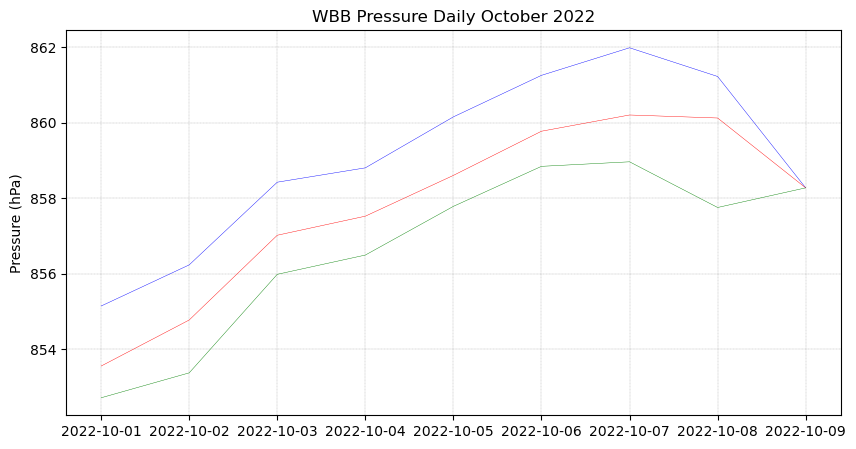

In [36]:
fig,(ax1) = plt.subplots(1,1,figsize=(10,5))
# using the dataframes index Date as the x axis 
ax1.plot(wbb_day_max.index,wbb_day_max.PRES,color='blue',linewidth=.3)
ax1.plot(wbb_day_med.index,wbb_day_med.PRES,color='red',linewidth=.3)
ax1.plot(wbb_day_min.index,wbb_day_min.PRES,color='green',linewidth=.3)
ax1.set(ylabel='Pressure (hPa)')
ax1.grid(linestyle='--', color='grey', linewidth=.2)
ax1.set_title('WBB Pressure Daily October 2022')
plt.savefig('figure_wbb_pres_daily_stats.png')

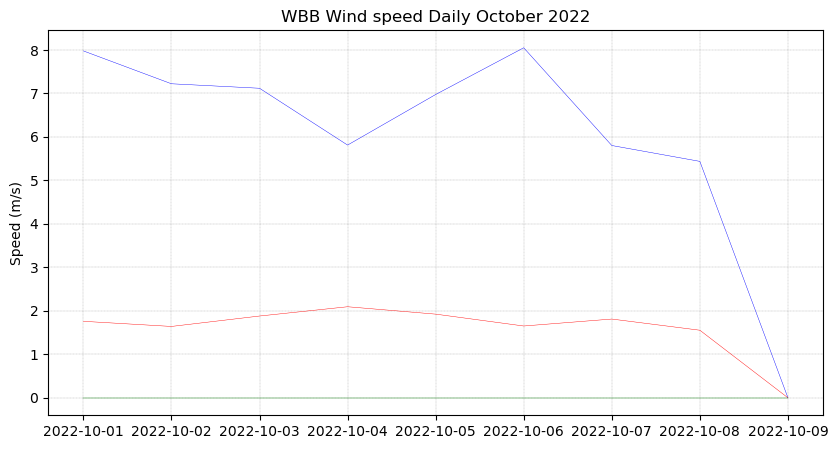

In [37]:
#oops said windspeed
fig,(ax1) = plt.subplots(1,1,figsize=(10,5))
# using the dataframes index Date as the x axis 
ax1.plot(wbb_day_max.index,wbb_day_max.SPED,color='blue',linewidth=.3)
ax1.plot(wbb_day_med.index,wbb_day_med.SPED,color='red',linewidth=.3)
ax1.plot(wbb_day_min.index,wbb_day_min.SPED,color='green',linewidth=.3)
ax1.set(ylabel='Speed (m/s)')
ax1.grid(linestyle='--', color='grey', linewidth=.2)
ax1.set_title('WBB Wind speed Daily October 2022')
plt.savefig('figure_wbb_sped_daily_stats.png')

<br><br>

# Want more practice!?
Check out the following webpages:<br>
https://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html<br>
https://www.youtube.com/watch?v=dcqPhpY7tWk&t=113s<br>
https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/subset-time-series-data-python/<br>


